# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In [10]:
df = pd.read_csv('Fraud.csv')

In [11]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
df.isnull().sum() #checking the missing values 

#here we can see that there is no missing values in the dataset  

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.info()
#variable data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Visualization of dataset 

In [14]:
# Legit Data and Fraud Data in isFraud 
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (legit + fraud))* 100
fraud_percent = (fraud / (legit + fraud)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


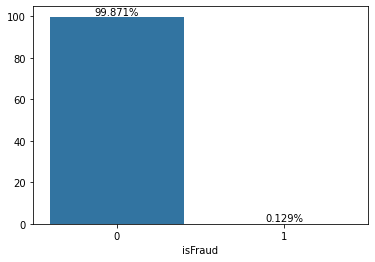

In [15]:
isFraud_total = df.groupby('isFraud').size()
isFraud_per = (isFraud_total/len(df))*100
ax = sns.barplot(x=isFraud_per.index, y=isFraud_per.values)

for bars in ax.containers:
    ax.bar_label(bars, fmt='%.3f%%')

In [11]:
type_of_transactions = df.groupby('type').size()
transaction_per = (type_of_transactions/len(df))*100

print('\nNumber of each transaction: ', type_of_transactions, '\n')
print('Percentage of each transaction: ', transaction_per, '\n')



Number of each transaction:  type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
dtype: int64 

Percentage of each transaction:  type
CASH_IN     21.992261
CASH_OUT    35.166331
DEBIT        0.651178
PAYMENT     33.814608
TRANSFER     8.375622
dtype: float64 



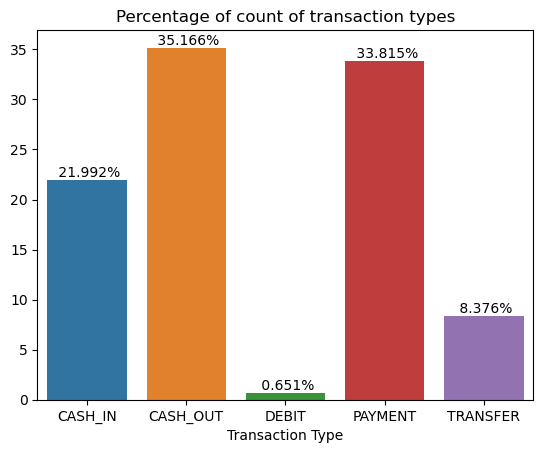

In [12]:
ax = sns.barplot(x=transaction_per.index, y=transaction_per.values)
plt.title('Percentage of count of transaction types')
plt.xlabel('Transaction Type')
for bars in ax.containers:
    ax.bar_label(bars, fmt='% .3f%%')

In [13]:
#Category wise transactions include Fraud and legit
fraud_by_transaction = df.groupby(['type', 'isFraud']).size().unstack()
per_fraud_by_transc =  (fraud_by_transaction/len(df))*100

print('\nNumber of fraud transaction of each category: ', fraud_by_transaction, '\n')
print('Percentage of each fraud transaction of each cateogry: ', per_fraud_by_transc, '\n')



Number of fraud transaction of each category:  isFraud           0       1
type                       
CASH_IN   1399284.0     NaN
CASH_OUT  2233384.0  4116.0
DEBIT       41432.0     NaN
PAYMENT   2151495.0     NaN
TRANSFER   528812.0  4097.0 

Percentage of each fraud transaction of each cateogry:  isFraud           0         1
type                         
CASH_IN   21.992261       NaN
CASH_OUT  35.101641  0.064690
DEBIT      0.651178       NaN
PAYMENT   33.814608       NaN
TRANSFER   8.311230  0.064392 



In [14]:
#Fraudlent transactions
Fraud_counts = df[df['isFraud'] == 1]['type'].value_counts()
Fraud_counts

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [15]:
per_Fraud = (Fraud_counts/len(df))*100
per_Fraud

CASH_OUT    0.064690
TRANSFER    0.064392
Name: type, dtype: float64

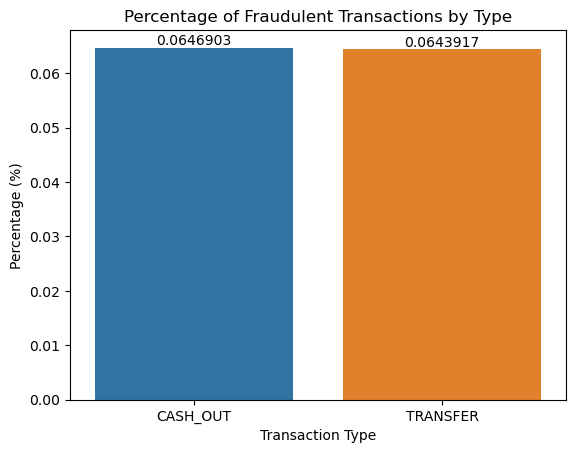

In [16]:
ax = sns.barplot(x=per_Fraud.index, y=per_Fraud.values)
plt.title('Percentage of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage (%)')
for bars in ax.containers:
    ax.bar_label(bars)

In [17]:
#Fraudlent transactions where the amount is more than 200
df[df['isFlaggedFraud']==1]['type'].value_counts()

TRANSFER    16
Name: type, dtype: int64

In [18]:
df[df['isFraud']==1]['oldbalanceDest'].count()

8213

In [19]:
df[df['isFraud']==1]['newbalanceDest'].count()

8213

In [20]:
corr=df.corr()
corrnew_df = df.copy()

/var/folders/w0/vnwsppxs2lx_bt03377nr5k40000gn/T/ipykernel_5789/3213143822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

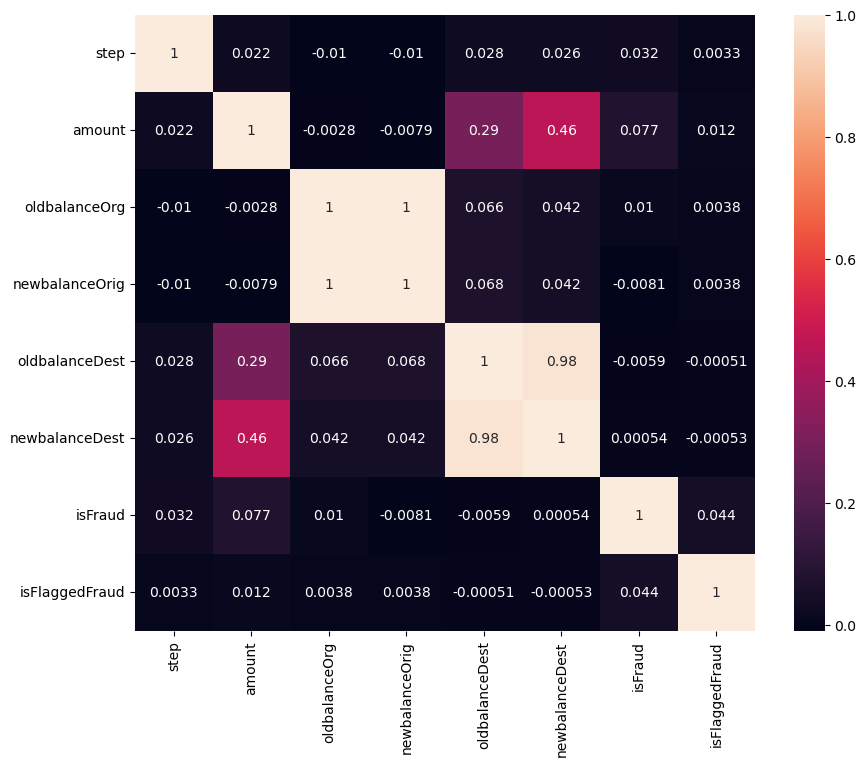

In [21]:

plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [22]:
new_df = df.copy()

In [23]:
objList = new_df.select_dtypes(include='object').columns
objList

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [24]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for f in objList:
    new_df[f] = le.fit_transform(new_df[f].astype(str))


print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [25]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


# Multicollinearity

In [26]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):


    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [27]:
new_df.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,3.176678e+06,8.338831e+05,8.551137e+05,7.464270e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,1.834064e+06,2.888243e+06,2.924049e+06,7.502455e+05,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,1.588332e+06,0.000000e+00,0.000000e+00,2.168950e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,3.176672e+06,1.420800e+04,0.000000e+00,4.322890e+05,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,4.765048e+06,1.073152e+05,1.442584e+05,1.132509e+06,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,6.353306e+06,5.958504e+07,4.958504e+07,2.722361e+06,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Outliers using boxplot

<Axes: >

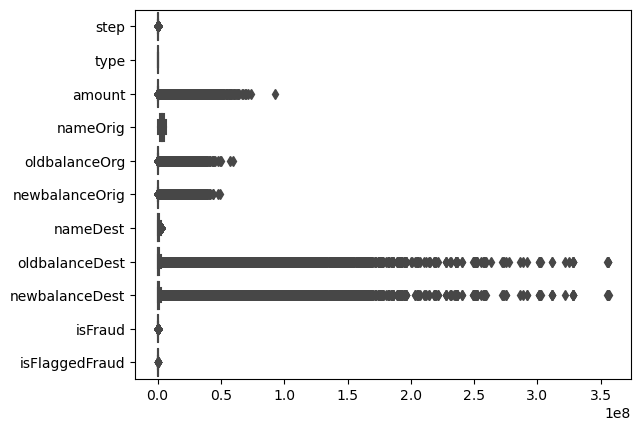

In [28]:
#Outlier using box
sns.boxplot(data=new_df, orient='h')

In [29]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis =1)

In [30]:
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis =1)

In [31]:
new_df['transaction_path'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'], axis = 1)

In [32]:
new_df = new_df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameOrig', 'nameDest'], axis =1)

In [33]:
calc_vif(new_df)

,variables,VIF
0,step,2.710678
1,type,2.863989
2,amount,3.890535
3,isFraud,1.189937
4,isFlaggedFraud,1.002563
5,Actual_amount_orig,1.332185
6,Actual_amount_dest,3.790322
7,transaction_path,3.472358


In [34]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,transaction_path
0,1,3,9839.64,0,0,9839.64,0.0,2419963.0
1,1,3,1864.28,0,0,1864.28,0.0,3922922.0
2,1,4,181.00,1,0,181.00,0.0,1441841.0
3,1,1,181.00,1,0,181.00,21182.0,6219958.0
4,1,3,11668.14,0,0,11668.14,0.0,4274900.0


<Axes: >

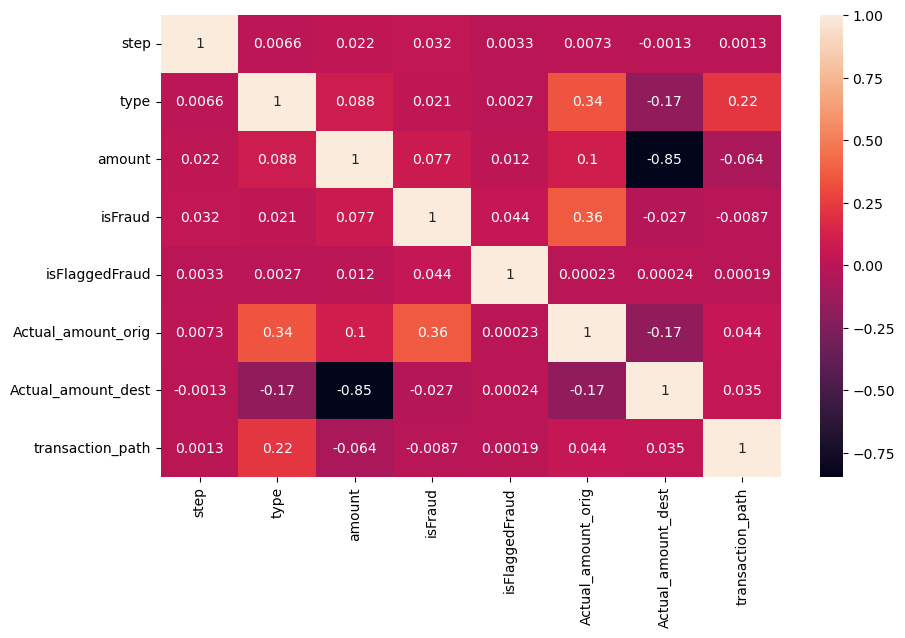

In [35]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Fraud Detection Model

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [37]:
y = new_df['isFraud']
X = new_df.drop(['isFraud'], axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=30)
model = LogisticRegression()

model.fit(train_X, train_y)

val_predict = model.predict(val_X)
mean_absolute_error(val_y, val_predict)

0.0012064212541374466

In [38]:
accuracy = accuracy_score(val_y, val_predict)
conf_matrix = confusion_matrix(val_y, val_predict)
class_report = classification_report(val_y, val_predict)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9987935787458625
Confusion Matrix:
 [[1588026     560]
 [   1359     710]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.56      0.34      0.43      2069

    accuracy                           1.00   1590655
   macro avg       0.78      0.67      0.71   1590655
weighted avg       1.00      1.00      1.00   1590655



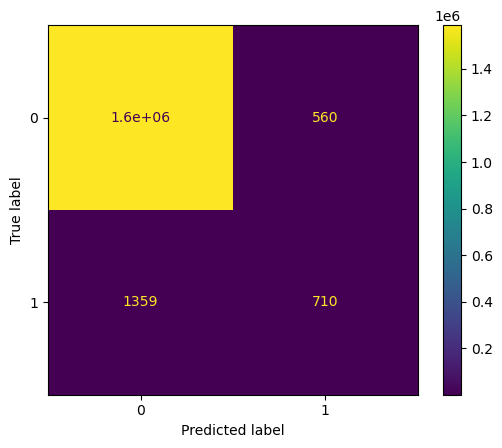

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

# Conclusion

1. Data cleaning including missing values, outliers and multi-collinearity.

   -No null values were found during the analysis. The columns that were examined include 'isFraud,' 'isFlaggedFraud,' and 
   'type.'
   
   -A new column was created by subtracting 'oldbalanceOrg' from 'newbalanceOrig.' Similarly, another new column was created by 
    subtracting 'oldbalanceDest' from 'newbalanceDest.'
    
   -The columns 'oldbalanceOrg,' 'newbalanceOrig,' 'oldbalanceDest,' 'newbalanceDest,' 'nameOrig,' and 'nameDest' were removed 
    from the dataset.
    
    
    
    


    
    
2. Describe your fraud detection model in elaboration.

    -Logistic regression was chosen for the fraud detection model due to its suitability for binary classification tasks like  
     fraud detection, where we need to predict a binary target value ('isFraud').

    -The selected features for this model are derived from the cleaned dataset 'new_df,' which includes columns relevant to the 
    transaction characteristics.

    -The target variable, 'isFraud,' is the primary focus ('X') of this model, representing whether a transaction is fraudulent 
     or not.

    -Other selected features in 'y' encompass various transaction attributes that could be indicative of fraud, such as 
    'amount,' 'type of transaction,' and the differences between 'oldbalance' and 'newbalance' for both sender and receiver 
     accounts.

    -Logistic regression's simplicity and interpretability make it a suitable choice for fraud detection, enabling us to analyze 
     the relationships between the selected features and the likelihood of fraud ('isFraud') effectively.

3. How did you select variables to be included in the model?

    -Data types of variables were transformed using label encoding to ensure they were suitable for modeling.
    
    -A heatmap analysis was applied to assess multicollinearity among the variables and detect potential outliers.
    
    -This heatmap analysis revealed which features exhibited higher collinearity, aiding in the selection process.
    
    -Features deemed relevant and non-collinear were then carefully chosen and stored in the 'new_df' dataset.
    
    -The final model was implemented using these selected features to achieve improved predictive performance and model 
     interpretability.

4. Demonstrate the performance of the model by using best set of tools. 
   
   -Accuracy Score: The accuracy of the model is approximately 99.88%, indicating a high level of overall correctness in its 
    predictions.

    -Confusion Matrix:
     True Positives (correctly predicted positive cases): 710
     True Negatives (correctly predicted negative cases): 1,588,026
     False Positives (predicted positive when actual is negative): 560
     False Negatives (predicted negative when actual is positive): 1,359
     The confusion matrix provides a detailed breakdown of model predictions, revealing that it made relatively few errors.

    -Classification Report:
     Precision for class 1 (fraudulent transactions): 56%
     Recall for class 1: 34%
     F1-score for class 1: 43%
     
     These class-specific metrics for detecting fraud provide insights into the model's performance on the minority class, which
     is important in fraud detection.
     
     The accuracy, precision, recall, and F1-score metrics are calculated for both classes (0 and 1) in the dataset, providing a 
     comprehensive view of model performance.
     
     The weighted average F1-score is 1.00, indicating strong overall model performance, while the macro average F1-score is 
     0.71, providing an average across classes.

    -ConfusionMatrixDisplay (if available): 
    If available, this tool would create visual representations of the confusion matrix, making it easier for non-technical
    stakeholders to understand the model's performance, particularly in identifying strengths and weaknesses.



5. What are the key factors that predict fraudulent customer

   -Transaction History of Vendors ('type' column helped to identify this):
        The type of transactions conducted by vendors plays a significant role in identifying fraudulent customers. Certain 
        transaction types( CASH_OUT, TRANSFER ) may be more associated with fraudulent activity.
        
    -Source of the Recipient Secured or Not:
        Determining whether the source of the recipient (e.g., the destination account) is secured or not can be a crucial 
        factor in predicting fraudulent customers. Unsecured sources may be more susceptible to fraudulent transactions.

6. Do these factors make sense? If yes, How? If not, How not?

    -Yes, these factors make sense as they align with common fraudulent patterns, including recipient security and transaction 
    history analysis.
    
    -The recipient's security status is crucial, as fraudsters exploit unsecured sources. Analyzing transaction types, like 
    cash-outs, helps detect fraud.
    
    -These factors enable the detection of anomalies and patterns, aiding in proactive fraud prevention and enhanced security 
    measures.

7. What kind of prevention should be adopted while company update its infrastructure?

    -Utilize Smart Verified Tools:
        Employ trusted and verified tools and software when updating infrastructure to ensure security and compatibility.
          
    -Browse Through Secure Websites:
        Ensure that all web interactions during the infrastructure update are restricted to secure, trusted websites to avoid exposure to malicious content.
          
    -Use Secure Internet Connection (VPN):
        Maintain a secure internet connection, preferably through a Virtual Private Network (VPN), to safeguard data during the update process. VPNs encrypt data and protect against unauthorized access.

8. Assuming these actions have been implemented, how would you determine if they work

    To determine if the implemented actions for improving security are effective, consider the following steps:

-Monitor for Missing Notifications:
  - Check if there are instances where the bank fails to send notifications regarding debit transactions. A sudden reduction in such occurrences can indicate improved security measures.

- Verify Bank Responses:
  -Assess whether the bank consistently sends e-statements and responses to customer inquiries. A reliable stream of responses can indicate the bank's commitment to security and communication.

- Regularly Review Account Activity:
  -Encourage customers to proactively review their account activity and transaction history. Fewer unauthorized transactions and irregularities in account records are positive indicators of enhanced security measures.

By examining these aspects, you can gauge the effectiveness of the implemented security measures and ensure that customers are informed and engaged in protecting their financial assets.